In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


# Data analysis

In [ ]:
%pwd

'/content'

In [1]:
%cd /content/drive/MyDrive/Colab/pydomains

/content/drive/MyDrive/Colab/pydomains


In [ ]:
df = pd.read_csv('data/domain_min_greater_than_5_words_v3.csv.gz')

In [ ]:
df.head()

,text,domain,cat_name
0,partner local last time public atlantic throug...,neptunesoccer,recreation
1,die puff berlin dich gast seit da hause wir sind,carena-girls,porn
2,spin single cat casino post edit situs fortune...,natlhistoricseaport,recreation
3,unlocked crew throughout entertainment pistol ...,gta-sanandreas,hobby
4,genius topi lost vice sunny zero zag zig seed ...,radionaba,webradio


In [ ]:
df.shape

(263602, 3)

In [ ]:
df = df.fillna('')

In [ ]:
df['cat_name'].unique()

array(['recreation', 'porn', 'hobby', 'webradio', 'shopping', 'news',
       'gamble', 'music', 'ringtones', 'forum', 'downloads', 'automobile',
       'education', 'finance', 'jobsearch', 'spyware', 'drugs',
       'hospitals', 'religion', 'science', 'radiotv', 'hacking', 'adv',
       'politics', 'fortunetelling', 'redirector', 'weapons', 'dating',
       'socialnet', 'tracker', 'webmail', 'library', 'movies',
       'government', 'sex', 'models', 'isp', 'imagehosting', 'homestyle',
       'urlshortener', 'alcohol', 'searchengines', 'warez', 'aggressive',
       'webtv', 'military', 'updatesites', 'webphone', 'podcasts',
       'anonvpn', 'costtraps', 'violence', 'remotecontrol', 'dynamic'],
      dtype=object)

In [ ]:
len(df['cat_name'].unique())

54

In [ ]:
df.groupby('cat_name').count()

,text,domain
cat_name,,
adv,746,746
aggressive,66,66
alcohol,323,323
anonvpn,31,31
automobile,1491,1491
costtraps,27,27
dating,475,475
downloads,556,556
drugs,560,560


In [ ]:
categories_less_than_100 = df.groupby('cat_name').count()[df.groupby('cat_name').count()['text'] < 100].index

In [ ]:
categories_less_than_100

Index(['aggressive', 'anonvpn', 'costtraps', 'dynamic', 'homestyle', 'library',
       'military', 'podcasts', 'remotecontrol', 'ringtones', 'updatesites',
       'violence', 'webphone', 'webtv'],
      dtype='object', name='cat_name')

In [ ]:
# df = df.drop(df[df['category_names'].isin(categories_less_than_100)].index)

In [ ]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [ ]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [ ]:
classes = df.groupby('cat_name').count().index

In [ ]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64', name='category_codes')

In [ ]:
df.loc[df['category_codes'] == 43]

,text,domain,cat_name,category_codes
85,hot agar situs fortune gadget strategi mau rep...,adtrgt,spyware,43
408,province industrial park road lake sung compan...,yourstats,spyware,43
535,resolution local third supposed contractual st...,privacy-please,spyware,43
591,local human make efficient regular satisfactio...,icwb,spyware,43
713,price specific third constitute buy owner info...,buy-traffic,spyware,43
...,...,...,...,...
262599,bacteria anil post sterilize led mineralizatio...,virushunter,spyware,43
263120,dont longer member provide support enter reali...,adultprovide,spyware,43
263385,connected cat led bed pound subtotal night cut...,defendyourpc,spyware,43
263427,center product machinery company shanghai prof...,12v3,spyware,43


In [ ]:
df.head()

,text,domain,cat_name,category_codes
0,partner local last time public atlantic throug...,neptunesoccer,recreation,33
1,die puff berlin dich gast seit da hause wir sind,carena-girls,porn,31
2,spin single cat casino post edit situs fortune...,natlhistoricseaport,recreation,33
3,unlocked crew throughout entertainment pistol ...,gta-sanandreas,hobby,17
4,genius topi lost vice sunny zero zag zig seed ...,radionaba,webradio,52


In [ ]:
df['domain'] + ' ' + df['text'] 

0         neptunesoccer partner local last time public a...
1         carena-girls die puff berlin dich gast seit da...
2         natlhistoricseaport spin single cat casino pos...
3         gta-sanandreas unlocked crew throughout entert...
4         radionaba genius topi lost vice sunny zero zag...
                                ...                        
263597    jades envelope dreng leger de rammer adobe se ...
263598    pornstrapon summer stepmother incredible boss ...
263599    awatunahomestead.co local last bed make amazin...
263600    sportsequip.co single post local economically ...
263601    otterstail post wrong charge usage develop suc...
Length: 263602, dtype: object

In [ ]:
len_of_text = df['text'].str.split("\\s+")

In [ ]:
len_of_text.str.len().max()

8469

In [ ]:
df.loc[df['cat_name'] == 'news']

,text,domain,cat_name,category_codes
7,last third state first chat institute charitab...,wearablesbusiness,news,28
16,summer studio equity history shift ask descent...,wusc.sc,news,28
21,innovative local lead spa state throughout res...,connect-utah,news,28
42,led develop seeing first standard big architec...,iptc,news,28
95,pointing fox archive public trump need root br...,conwebwatch,news,28
...,...,...,...,...
263449,last geek entertainment weve orange cannot th ...,robertniles,news,28
263467,sa al es contra covid nova hi si test son viva...,catalunyainformacio,news,28
263521,die forum teil version public ist mythos chat,newsatelier,news,28
263552,moon local coverage contest public studio effe...,wknc,news,28


# Split Data

In [ ]:
X = (df['domain'] + ' ' + df['text']).values
y = df['category_codes'].values

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.size

210881

In [ ]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int8),
 array([  596,    54,   264,    28,  1200,    21,   370,   447,   455,
            8,  3015,  3476,   264,  1536,  1434,   179,    84,  7922,
           70,   655,   101,   205,  1111,    61,    47,   272,  1122,
         1819, 12146,    34,   592, 43945,  1516, 75156,  1011,  3231,
           17,    59,   435,   153,   184, 42391,   148,  1122,   109,
           17,   132,    40,   155,   187,   317,    18,   878,    72]))

In [ ]:
X_rem.size

52721

In [ ]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int8),
 array([  150,    12,    59,     3,   291,     6,   105,   109,   105,
            1,   769,   803,    70,   407,   389,    44,    21,  2075,
           23,   161,    29,    42,   273,    17,    14,    74,   281,
          417,  3018,     6,   151, 10854,   389, 18804,   240,   810,
            2,    16,   111,    26,    54, 10713,    48,   275,    24,
            3,    35,     7,    37,    50,    73,     3,   200,    22]))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [ ]:
X_val.size

26360

In [ ]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34,
        35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53], dtype=int8),
 array([  73,    5,   30,    2,  152,    2,   44,   58,   51,    1,  379,
         390,   42,  186,  186,   18,   13, 1051,   13,   79,   18,   25,
         141,   10,    6,   43,  150,  200, 1481,   84, 5346,  186, 9464,
         112,  417,    7,   65,   12,   28, 5394,   29,  144,   14,    2,
          18,    5,   15,   18,   35,    2,  100,   14]))

In [ ]:
X_test.size

26361

In [ ]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53], dtype=int8),
 array([  77,    7,   29,    1,  139,    4,   61,   51,   54,  390,  413,
          28,  221,  203,   26,    8, 1024,   10,   82,   11,   17,  132,
           7,    8,   31,  131,  217, 1537,    6,   67, 5508,  203, 9340,
         128,  393,    2,    9,   46,   14,   26, 5319,   19,  131,   10,
           1,   17,    2,   22,   32,   38,    1,  100,    8]))

In [ ]:
X_train[10000]

'unpar.ac international partner guna sisi covid tracer agar situs auditorium exit masa video data agenda institute foundation month follow lain may untar bulletin cofounder gas university global di baru dari total member media dan office program ide yang portal tour balut dewan reak alumni campus digital virtual mail magister current guru bhakti study'

In [ ]:
y_train[10000]

10

In [ ]:
df[df['domain'].str.contains('unpar.ac')]

,text,domain,cat_name,category_codes
217181,international partner guna sisi covid tracer a...,unpar.ac,education,10


In [ ]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [ ]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# Creating Dataset

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'virginiabeachresort outdoorsman bed throughout responsible statue oyster species lot collection combination visitor source military couple flavorful serve tide meet dairy band budget family close tourism article take coupon though comfort dome large pose gat retreat concierge aid meeting lane stop wisely international acrobatic hot price provide cover choose fill sitting lover video doesnt must station general thats associated run professional boarding craft club cut ocean good queen massive trip allow life booking group custom peaceful dining authentic sample seem important blow established ski jewelry united precisely inlet coffee based nights inland whole majestically going policy featured fire tap commonly visit mineral exactly favorite tough dogs course la dinner understand focus store serving skies try slightly district mistake truth wine although select start lodging type concept smoking little fine safety driving near great interest let hit rock guard height ga

# vocab size

In [ ]:
from collections import Counter
  
vocab = Counter()

def build_cat_vocab(cat, text):
  final = cat  + ' ' + text
  vocab.update(final.split())
  
for index, row in df.iterrows():
  build_cat_vocab(row['cat_name'], row['text'])

In [ ]:
len(vocab)

65251

In [ ]:
len_of_text.str.len().max()

8469

# Vectorization

In [ ]:
max_features = len(vocab)
sequence_length = 8469

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 8469), dtype=int64, numpy=array([[    1, 18553,   444, ...,     0,     0,     0]])>, <tf.Tensor: shape=(54,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>)


In [ ]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  vision
Vocabulary size: 65251


In [ ]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [ ]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [ ]:
embedding_dim = 256 # tested with 64
weight_decay = 0.00001

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150,
                        activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=weight_decay, l2=weight_decay),
                        bias_regularizer=regularizers.L2(weight_decay),
                        activity_regularizer=regularizers.L2(weight_decay)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         16704512  
                                                                 
 dropout_3 (Dropout)         (None, None, 256)         0         
                                                                 
 global_average_pooling1d_1   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               38550     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                      

In [ ]:
embedding_dim = 64 # tested with 64

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          3200064   
                                                                 
 dropout_11 (Dropout)        (None, None, 64)          0         
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 54)                3510      
                                                                 
Total params: 3,203,574
Trainable params: 3,203,574
Non-trainable params: 0
____________________________________________

In [ ]:
model_save_filename = "model_v3_260k.h5"

In [ ]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.001



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [ ]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
3295/3296 [============================>.] - ETA: 0s - loss: 1.9237 - accuracy: 0.4198
Epoch 1: val_accuracy improved from -inf to 0.47546, saving model to model_v3_260k.h5
3296/3296 [==============================] - 271s 82ms/step - loss: 1.9237 - accuracy: 0.4198 - val_loss: 1.7376 - val_accuracy: 0.4755 - lr: 0.0010
Epoch 2/500
3295/3296 [============================>.] - ETA: 0s - loss: 1.5252 - accuracy: 0.5988
Epoch 2: val_accuracy improved from 0.47546 to 0.58297, saving model to model_v3_260k.h5
3296/3296 [==============================] - 261s 79ms/step - loss: 1.5252 - accuracy: 0.5988 - val_loss: 1.5495 - val_accuracy: 0.5830 - lr: 1.0000e-03
Epoch 3/500
3295/3296 [============================>.] - ETA: 0s - loss: 1.3880 - accuracy: 0.6449
Epoch 3: val_accuracy improved from 0.58297 to 0.60410, saving model to model_v3_260k.h5
3296/3296 [==============================] - 261s 79ms/step - loss: 1.3880 - accuracy: 0.6449 - val_loss: 1.5041 - val_accuracy: 0.6041 -

In [ ]:
!chmod 755 /content/drive/MyDrive/pushover && /content/drive/MyDrive/pushover "piedomains training job done"

{"status":1,"request":"bbc09c0e-72f3-4f11-9903-6d78b467c3ac"}

# Evaluate

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

412/412 [==============================] - 2s 6ms/step - loss: 1.0687 - accuracy: 0.7400
Loss:  1.0687191486358643
Accuracy:  0.7400326132774353


# Confusion Matrix

In [ ]:
test_txt = []
test_labels = []

for txt, label in test_ds:
  for t in txt:
    test_txt.append(t.numpy())
  for l in label:
    test_labels.append(l.numpy())

In [ ]:
len(test_txt)

26361

In [ ]:
len(test_labels)

26361

In [ ]:
len(test_txt[0])

8469

In [ ]:
len(test_labels[0])

54

In [ ]:
test_txt = np.array(test_txt)
test_labels = np.array(test_labels)

In [ ]:
predicted = model.predict(test_txt)

In [ ]:
len(predicted)

26361

In [ ]:
y_pred = np.argmax(predicted, axis=1)
y_true = np.argmax(test_labels, axis=1)

In [ ]:
test_acc = sum(y_pred == y_true) / len(y_true)

In [ ]:
test_acc

0.7400326239520504

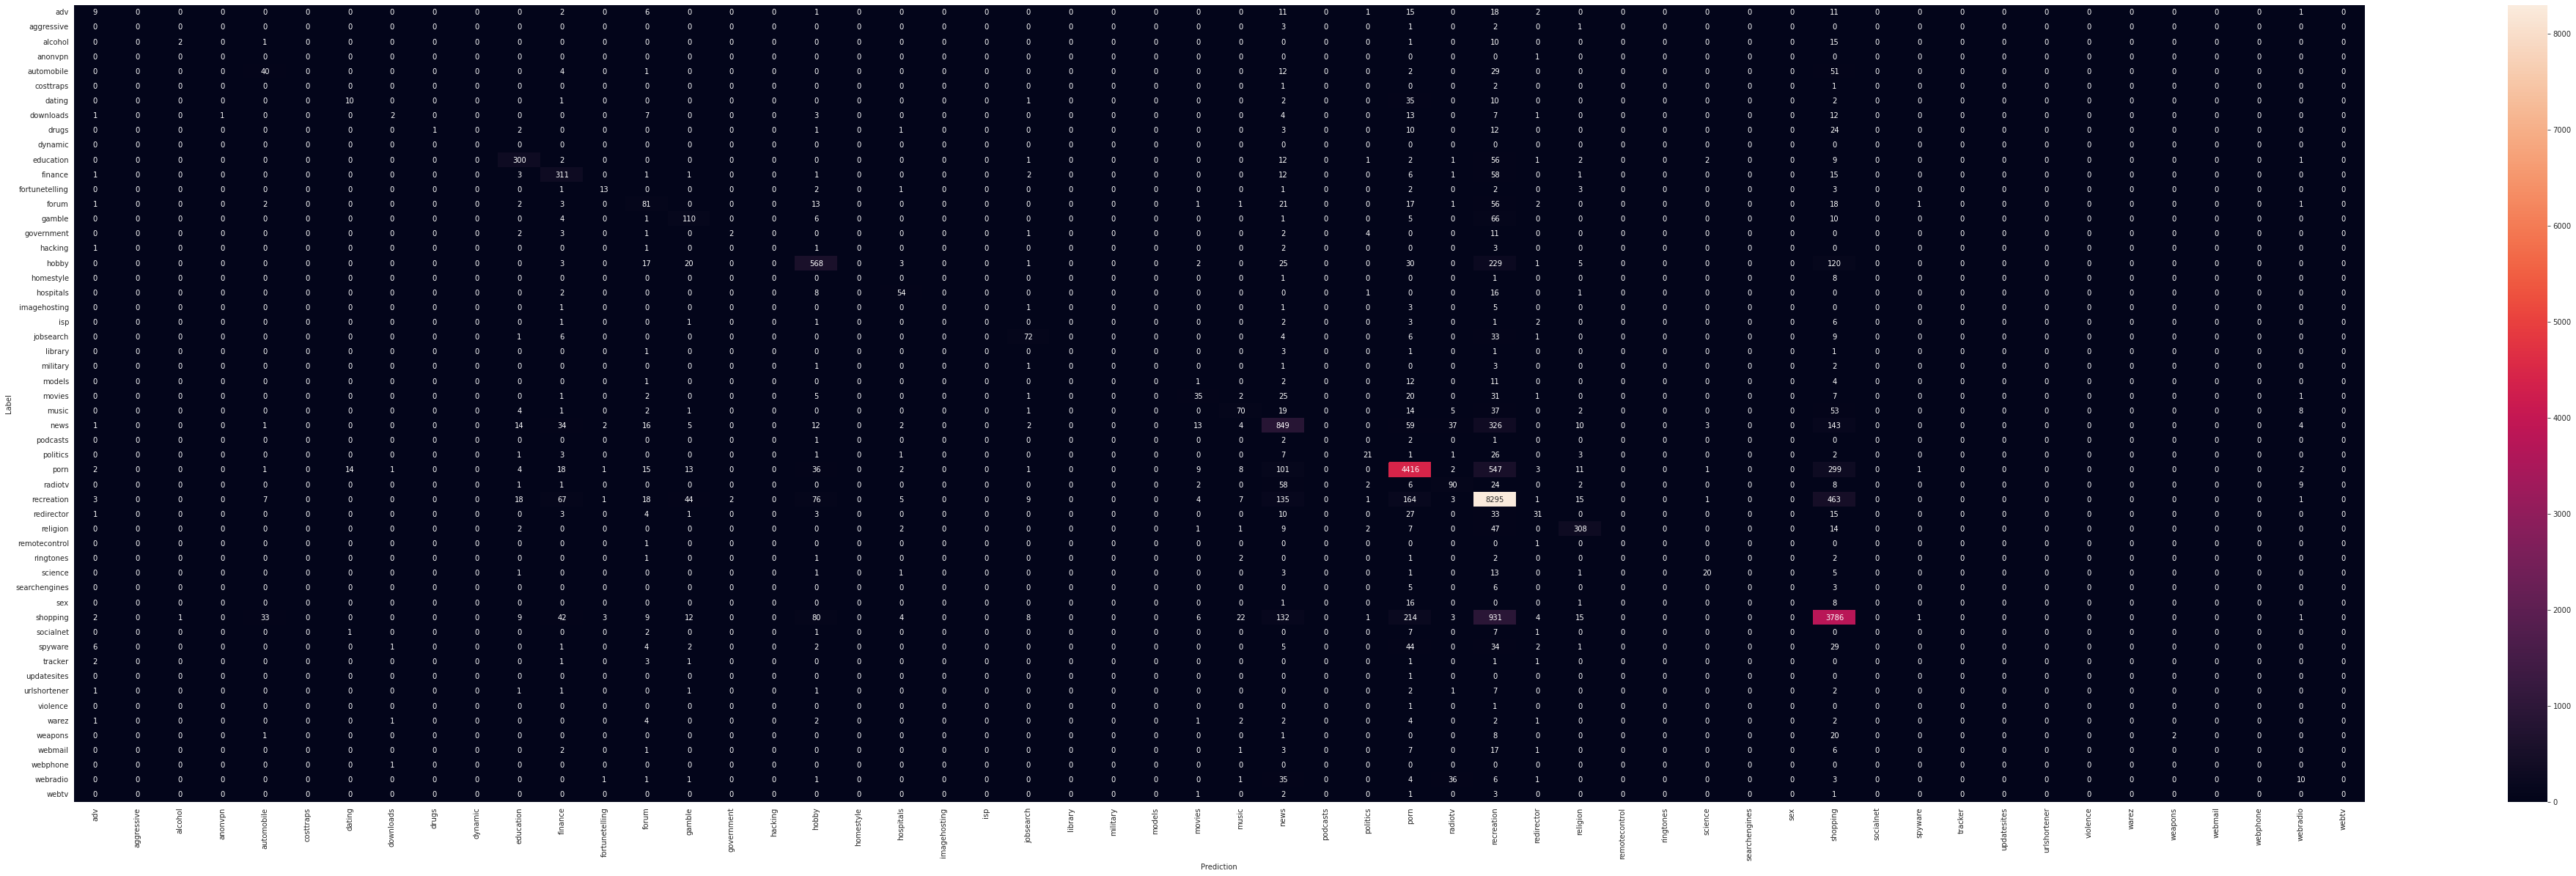

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(70, 20))
sns.set_style(style='white')

sns.heatmap(confusion_mtx,
            xticklabels=classes,
            yticklabels=classes,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Plot

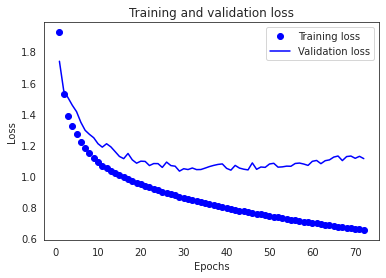

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

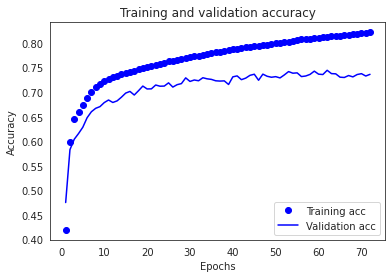

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

412/412 [==============================] - 4s 8ms/step - loss: 1.0687 - accuracy: 0.7400
0.7400326132774353


# Inference

In [ ]:
examples = [
    "yahoo.com",
    "forbes.com",
    "xvideos.com",
    "last.fm",
    "facebook.com",
    "bellesa.co",
    "marketwatch.com"
]


import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
most_common_words = ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service', 'en', 'get', 'one', 'find', 'menu', 'account', 'next']
# ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service']


def tag_visible(element):
    if element.parent.name in ['style', 'script']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      # remove most common words
      tokens = [w for w in tokens if not w in most_common_words]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  print(f"{examples[i]}")
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


yahoo.com
forbes.com
xvideos.com
last.fm
facebook.com
bellesa.co
marketwatch.com


In [ ]:
examples

['yahoo celebrity video weather shopping deadline wed life politics mail yesterday today tomorrow finance insider world sports entertainment scoreboard people',
 'forbes breaking business money innovation store popular advertise leadership subscribe advisor education',
 'xvideos bus gay beach squirting interracial hard solo film voyeur ass fisting gapes straight black orgasm rough redhead advertising lingerie blonde mature vintage brunette chubby amateur oiled history teen anal cougar casting compilation',
 'last reset live play music close company subscribe reload previous back dismiss twitter merchandise',
 'facebook bulletin local watch messenger portal oculus',
 'bellesa preview massage homemade audio sensual store squirt erotica romance giveaway kink orgy passionate anal bondage vixen story amateur rough',
 'marketwatch canada company symbol video economy change clear latest accessibility edge opinion stocks lulu dish fire safari chrome travel volume range retirement twitter infla

In [ ]:
results = export_model.predict(examples)

In [ ]:
probs = tf.nn.softmax(results)

In [ ]:
probs[3]

<tf.Tensor: shape=(54,), dtype=float32, numpy=
array([0.01826702, 0.01817596, 0.01816415, 0.01816335, 0.01817589,
       0.0181694 , 0.01817513, 0.01824361, 0.01818315, 0.01816236,
       0.01850898, 0.01835661, 0.01819109, 0.01854796, 0.01817634,
       0.01840566, 0.01817004, 0.01882924, 0.01816359, 0.01820253,
       0.01817155, 0.01817966, 0.01818549, 0.01819214, 0.0181826 ,
       0.01818367, 0.01826387, 0.02028858, 0.02299694, 0.01818098,
       0.0191478 , 0.01917111, 0.01922144, 0.02111429, 0.0182537 ,
       0.0183954 , 0.01816231, 0.01818375, 0.01858203, 0.01820934,
       0.01816653, 0.018913  , 0.01824387, 0.01830977, 0.01818811,
       0.01817369, 0.01834745, 0.01816297, 0.01818981, 0.01816731,
       0.01833424, 0.01816486, 0.01971725, 0.01822248], dtype=float32)>

In [ ]:
res_args = tf.argmax(results, 1)

In [ ]:
res_args

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([33, 28, 31, 28, 33, 31, 28])>

In [ ]:
res_args.numpy()

array([33, 28, 31, 28, 33, 31, 28])

In [ ]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [ ]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : recreation
forbes : news
xvideos : porn
last : news
facebook : recreation
bellesa : porn
marketwatch : news


In [ ]:
from collections import Counter
  
cat_vocab = {}

def build_cat_vocab(cat, text):
  if cat not in cat_vocab:
    cat_vocab[cat] = Counter()
  cat_vocab[cat].update(text.split())
  

for index, row in df.iterrows():
  build_cat_vocab(row['cat_name'], row['text'])

In [ ]:
x = 'scoreboard celebrity politics next mon finance insider sun billboard yesterday mail sat people today weather tomorrow shopping entertainment life sports style'
for i in x.split():
  print(f"{i} - {cat_vocab['porn'][i]}")

scoreboard - 14
celebrity - 2892
politics - 439
next - 0
mon - 3179
finance - 546
insider - 195
sun - 1464
billboard - 64
yesterday - 637
mail - 1643
sat - 525
people - 5688
today - 6202
weather - 381
tomorrow - 652
shopping - 1957
entertainment - 3438
life - 5794
sports - 1899
style - 3939


# Export Model

In [ ]:
export_model.save('saved_model/piedomains_260k_v3')

In [ ]:
!ls -ltr

total 395171
-rw------- 1 root root    651394 Apr 29 00:06 train_v2.ipynb
-rw------- 1 root root     14386 Apr 29 00:59 parser.ipynb
drwx------ 2 root root      4096 Apr 29 22:11 data
drwx------ 2 root root      4096 Apr 29 22:37 models
-rw------- 1 root root    190456 May  3 19:19 data.ipynb
-rw------- 1 root root    498169 May  3 20:00 train.ipynb
-rw------- 1 root root     14021 May  3 22:04 testpackage.ipynb
-rw------- 1 root root    178127 Sep  4 22:43 data_v2.ipynb
-rw------- 1 root root 201153616 Sep  5 19:23 model_v3.h5
-rw------- 1 root root    421360 Sep  5 20:55 train_v3_500k.ipynb
-rw------- 1 root root 201049168 Sep  6 01:27 model_v3_260k.h5
drwx------ 4 root root      4096 Sep  6 03:24 saved_model
-rw------- 1 root root    469972 Sep  6 03:28 train_v3.ipynb


# Load and test model

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  loaded_model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

In [ ]:
export_model2 = tf.keras.models.load_model('saved_model/piedomains_260k_v3')

In [ ]:
examples = [
    "yahoo.com",
    "forbes.com",
    "draftkings.com/",
    "pornhub.com",
    "xvideos.com",
    "google.com",
    "amazon.com",
    "facebook.com",
    "fidelity.com",
    "youtube.com",
    "youporn.com",
    "bellesa.co",
    "medium.com",
    "khanacademy.org"
]


nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
most_common_words = ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service', 'en', 'get', 'one', 'find', 'menu', 'account', 'next']
# ['home', 'contact', 'us', 'new', 'news', 'site', 'privacy', 'search', 'help', 'copyright', 'free', 'service']


def tag_visible(element):
    if element.parent.name in ['style', 'script']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      # remove most common words
      tokens = [w for w in tokens if not w in most_common_words]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  print(f"{examples[i]}")
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


yahoo.com
forbes.com
draftkings.com/
pornhub.com
xvideos.com
google.com
amazon.com
facebook.com
fidelity.com
youtube.com
youporn.com
bellesa.co
medium.com
khanacademy.org


In [ ]:
examples

['yahoo celebrity business video weather shopping deadline final wed life politics mail yesterday today tomorrow finance insider world sports entertainment scoreboard people',
 'forbes breaking business money innovation store popular advertise leadership subscribe advisor education',
 'draftkings casual tournament soccer dynasty sports casino tennis',
 'pornhub upgrade cancel dick explore popular gay random resend angel masturbation public bondage verify mobile exclusive film yesterday ass access premium community black threesome orientation advertise information pussy ebony mature white august hot amateur preview feedback press discover login sex cartoon aria anal content dutch',
 'xvideos oiled advertising history solo lingerie film redhead bus blonde beach gay voyeur ass fisting gapes straight squirting teen mature interracial anal vintage brunette chubby hard cougar black orgasm amateur rough casting compilation',
 'google ',
 'amazon ',
 'facebook bulletin local watch messenger po

In [ ]:
results = export_model2.predict(examples)

In [ ]:
probs = tf.nn.softmax(results)

In [ ]:
probs[0]

<tf.Tensor: shape=(54,), dtype=float32, numpy=
array([0.01971039, 0.01817713, 0.01816067, 0.01816256, 0.01820597,
       0.01816832, 0.01817089, 0.01839317, 0.01823824, 0.01816393,
       0.01816398, 0.01855451, 0.01816212, 0.02139111, 0.01823836,
       0.01816893, 0.0182217 , 0.01844787, 0.01816203, 0.01816052,
       0.01819348, 0.01840081, 0.01820394, 0.01816572, 0.01818574,
       0.01819287, 0.0181747 , 0.01816504, 0.0210237 , 0.0181686 ,
       0.01818157, 0.02046124, 0.01816803, 0.02253328, 0.01848238,
       0.01816896, 0.01816075, 0.01816258, 0.01818377, 0.01832112,
       0.018164  , 0.01882122, 0.01830737, 0.01917215, 0.01833709,
       0.01817198, 0.01837218, 0.01816467, 0.01818577, 0.01816956,
       0.01867591, 0.01816892, 0.01817743, 0.01819095], dtype=float32)>

In [ ]:
res_args = tf.argmax(results, 1)

In [ ]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : recreation
forbes : news
draftkings : recreation
pornhub : porn
xvideos : porn
google : recreation
amazon : recreation
facebook : recreation
fidelity : recreation
youtube : recreation
youporn : porn
bellesa : porn
medium : recreation
khanacademy : recreation


In [ ]:
labels = []
domain_probs = []

for i in range(len(examples)):
    labels.append(classes[res_args[i]])
    domain_probs.append(np.around(probs[i][res_args[i]] * 100))

In [ ]:
labels

['recreation',
 'news',
 'recreation',
 'porn',
 'porn',
 'recreation',
 'recreation',
 'recreation',
 'recreation',
 'recreation',
 'porn',
 'porn',
 'recreation',
 'recreation']

In [ ]:
domain_probs

[2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 3.0, 2.0]

In [ ]:
export_model.save('/content/drive/MyDrive/Colab/pydomains/data/saved_model/newpydomains')

In [ ]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile', 'costtraps',
       'dating', 'downloads', 'drugs', 'dynamic', 'education', 'finance',
       'fortunetelling', 'forum', 'gamble', 'government', 'hacking', 'hobby',
       'homestyle', 'hospitals', 'imagehosting', 'isp', 'jobsearch', 'library',
       'military', 'models', 'movies', 'music', 'news', 'podcasts', 'politics',
       'porn', 'radiotv', 'recreation', 'redirector', 'religion',
       'remotecontrol', 'ringtones', 'science', 'searchengines', 'sex',
       'shopping', 'socialnet', 'spyware', 'tracker', 'updatesites',
       'urlshortener', 'violence', 'warez', 'weapons', 'webmail', 'webphone',
       'webradio', 'webtv'],
      dtype='object', name='cat_name')

In [2]:
!cp -R saved_model /tmp

In [3]:
!ls -ltr /tmp

total 44
lrwxrwxrwx 1 root root   66 Oct 28 17:42 kernel_manager_proxy.INFO -> kernel_manager_proxy.aebfb3b51e04.root.log.INFO.20221028-174212.12
-rw-r--r-- 1 root root 1700 Oct 28 17:42 kernel_manager_proxy.aebfb3b51e04.root.log.INFO.20221028-174212.12
srwxr-xr-x 1 root root    0 Oct 28 17:42 debugger_15rtdf9bgy
lrwxrwxrwx 1 root root   61 Oct 28 17:42 dap_multiplexer.INFO -> dap_multiplexer.aebfb3b51e04.root.log.INFO.20221028-174215.69
-rw-r--r-- 1 root root 1184 Oct 28 17:42 dap_multiplexer.aebfb3b51e04.root.log.INFO.20221028-174215.69
srw------- 1 root root    0 Oct 28 17:53 drivefs_ipc.0
srw------- 1 root root    0 Oct 28 17:53 drivefs_ipc.0_shell
drwx------ 2 root root 4096 Oct 28 17:53 initgoogle_syslog_dir.0
lrwxrwxrwx 1 root root   73 Oct 28 17:53 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.aebfb3b51e04.root.log.INFO.20221028-175319.313
drwxr-xr-x 3 root root 4096 Oct 28 17:53 python-languageserver-cancellation
-rw-r--r-- 1 root root 1658 Oct 28 17:53 directo

In [8]:
%cd /tmp/saved_model

/tmp/saved_model


In [9]:
%pwd

'/tmp/saved_model'

In [10]:
%ls

piedomains_260k_v3/  piedomains_v3/


In [11]:
!mv piedomains_260k_v3 piedomains

In [12]:
!rm -rf piedomains_v3

In [13]:
%ls

piedomains/


In [14]:
%cd /tmp

/tmp


In [18]:
!tar cfz shallalist_v3_model.tar.gz saved_model

In [19]:
!cp shallalist_v3_model.tar.gz /content/drive/MyDrive/Colab/pydomains/models/